In [6]:
import pandas as pd 
import numpy as np
import json
import os
from datetime import datetime
import matplotlib as plt
import seaborn as sns
# Plot styles

sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.style.use('seaborn-poster')
plt.style.use('fivethirtyeight')
plt.rcParams['axes.edgecolor'] = '#ffffff'
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.rcParams['figure.facecolor'] = '#ffffff'
plt.rcParams['patch.edgecolor'] = '#ffffff'
plt.rcParams['patch.facecolor'] = '#ffffff'
plt.rcParams['savefig.edgecolor'] = '#ffffff'
plt.rcParams['savefig.facecolor'] = '#ffffff'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16


file_array = []
dates = []
exchanges = []

for file in os.listdir("/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/"):
    if file.endswith("orderbook.json"):
        file_array.append(os.path.join("/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/", file))


for file in file_array:
    date = file.split('/')[6].split('_')[0]
    dates.append(date)

    
for file in file_array:
    exchange_name = file.split('/')[6].split('_')[1]
    exchanges.append(exchange_name)

In [7]:
slippage = []
slippage_pairs = []
currencies = []

for index, file in enumerate(file_array):
    print(file)
    try:
        with open(file, encoding='utf-8') as data_file:
            dataset = json.loads(data_file.read())
        for pair in dataset: 
            if (len(dataset[pair]['asks']) > 5 and len(dataset[pair]['bids']) > 5):
                currency = {}
                currency['Pair'] = pair
                currency['Asks'] = dataset[pair]['asks']
                currency['Bids'] = dataset[pair]['bids']
                currency['Date'] = dates[index]
                currency['Exchange'] = exchanges[index]
                currencies.append(currency)
    except:
        continue


        
df = pd.DataFrame(currencies)

pair_dict = {}


for pair, value in dict(df['Pair'].value_counts()).items():
    trading_currency = pair.split('/')[1]
    if trading_currency in pair_dict.keys():
        pair_dict[trading_currency] += value 
    else:
        pair_dict[trading_currency] = value

pair_dict

sorted(pair_dict.items(), key=lambda x: x[0])


#assume PAX TUSD USDC USDS USDT are 1 to 1 

#Find How much BNB BTC ETH XRP you can get for 10k USD

bitcoin_prices_in_usd = {}
eth_prices_in_usd = {}
bnb_prices_in_usd = {}
xrp_prices_in_usd = {}


for entry in currencies:
    if entry['Pair'] == 'BTC/USDT':
        bitcoin_prices_in_usd[(entry['Date'])] = (entry['Asks'][0][0] + entry['Bids'][0][0]) / 2
    if entry['Pair'] == 'ETH/USDT':
        eth_prices_in_usd[(entry['Date'])] = (entry['Asks'][0][0] + entry['Bids'][0][0]) / 2
    if entry['Pair'] == 'BNB/USDT':
        bnb_prices_in_usd[(entry['Date'])] = (entry['Asks'][0][0] + entry['Bids'][0][0]) / 2
    if entry['Pair'] == 'XRP/USDT':
        xrp_prices_in_usd[(entry['Date'])] = (entry['Asks'][0][0] + entry['Bids'][0][0]) / 2


def convert_cmc_to_binance(row):
    if row.split('/')[0] == 'BCHABC':
        return 'BCH' + '/' + row.split('/')[1]
    elif row.split('/')[0] == 'BCHSV':
        return 'BSV' + '/' + row.split('/')[1]
    elif row.split('/')[0] == 'YOYO':
        return 'YOYOW' + '/' + row.split('/')[1]
    else:
        return row

volume_dict = {}

df_rank = pd.read_csv('/users/anthony/desktop/slipping-and-sliding/all-exchanges/volume_rank.csv')





/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552450123412_zb_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552333145631_gdax_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552412264822_hitbtc2_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552416032797_huobipro_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552491483765_okex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552291645621_bitmex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552450123412_huobipro_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552212508672_kraken_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552366994970_bibox_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552472681726_bitfinex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552

/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552385768387_bittrex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552325604963_lbank_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552212508672_gdax_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552442602602_gdax_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552340662445_bitfinex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552223767918_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552483967024_gdax_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552182460001_gdax_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552434977167_okex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552378254554_zb_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552329383825

/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552253867842_gdax_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552355720497_bittrex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552336910014_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552268936007_zb_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552276479792_zb_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552238819983_zb_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552487724916_gdax_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552276479792_huobipro_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552385768387_zb_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552306812507_bitmex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552295486005_okex

/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552476449630_okex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552284057884_huobipro_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552201234381_lbank_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552201234381_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552242592836_bitfinex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552389522555_bitforex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552457637038_hitbtc2_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552495244379_bibox_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552220019119_zb_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552333145631_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1

/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552314331910_bitmex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552412264822_zb_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552287840747_hitbtc2_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552321846921_bitforex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552318088757_okex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552257622119_zb_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552276479792_poloniex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552186214119_bitforex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552208750872_hitbtc2_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552238819983_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/155

/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552465158563_bitfinex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552480209305_bibox_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552268936007_bibox_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552276479792_gdax_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552431158119_bitforex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552303053944_bitfinex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552310571402_poloniex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552370747987_okex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552468924543_kraken_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552502774781_bitmex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/

/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552495244379_bitforex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552385768387_bitforex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552427358871_kraken_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552321846921_lbank_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552321846921_bitmex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552397053647_lbank_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552419798699_bitforex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552182460001_bittrex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552408328771_poloniex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552499015708_huobipro_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exc

/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552189968781_kraken_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552291645621_huobipro_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552212508672_poloniex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552257622119_poloniex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552457637038_okex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552303053944_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552189968781_huobipro_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552408328771_bitmex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552502774781_zb_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552223767918_zb_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/155

/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552408328771_lbank_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552495244379_zb_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552423576510_bittrex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552268936007_bittrex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552393294270_bitfinex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552457637038_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552457637038_kraken_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552201234381_hitbtc2_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552193722038_okex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552502774781_bitforex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1

/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552472681726_okex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552476449630_hitbtc2_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552389522555_hitbtc2_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552321846921_bibox_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552434977167_bitforex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552397053647_bibox_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552355720497_bitforex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552461394566_bitforex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552220019119_hitbtc2_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552397053647_bitforex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-excha

/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552400811863_hitbtc2_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552310571402_lbank_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552235064368_okex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552318088757_kraken_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552246351499_zb_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552457637038_bitmex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552204992202_huobipro_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552238819983_poloniex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552235064368_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552344448963_poloniex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1

/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552348204958_lbank_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552189968781_bitfinex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552208750872_bibox_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552216262749_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552442602602_binance_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552408328771_bittrex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552431158119_bitfinex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552291645621_poloniex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552303053944_bitforex_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-exchanges/1552212508672_huobipro_orderbook.json
/Users/anthony/Desktop/slipping-and-sliding/all-e

IndexError: list index out of range

In [18]:
df[df['Exchange']=='bitmex']['Pair'].value_counts()
# def calc_total_order_book_depth(date, bids_or_asks, pair):
#     base_currency = pair.split('/')[1]
#     total_depth = 0
#     for bid_or_ask in bids_or_asks:
#         if base_currency == 'BTC':
#             total_depth += (bid_or_ask[0] * bitcoin_prices_in_usd[date] * bid_or_ask[1])
#         elif base_currency == 'XRP':
#             total_depth += (bid_or_ask[0] * xrp_prices_in_usd[date] * bid_or_ask[1])
#         elif base_currency == 'BNB':
#             total_depth += (bid_or_ask[0] * bnb_prices_in_usd[date] * bid_or_ask[1])
#         elif base_currency == 'ETH':
#             total_depth += (bid_or_ask[0] * eth_prices_in_usd[date] * bid_or_ask[1])
#         else:
#             total_depth += (bid_or_ask[0] * bid_or_ask[1])
#     return total_depth

# all_currencies = []

# for index, currency in enumerate(currencies):
#     currency_dict = {}
#     currency_dict['date'] = currency['Date']
#     currency_dict['pair'] = currency['Pair']
#     currency_dict['ask_depth'] = calc_total_order_book_depth(currency['Date'], currency['Asks'],currency['Pair'])
#     currency_dict['bid_depth'] = calc_total_order_book_depth(currency['Date'], currency['Bids'], currency['Pair'])
#     all_currencies.append(currency_dict)


exchange_pi
    
    
for index, row in df.iterrows():
    print(row['Exchange'], row['Pair'])


zb ZB/QC
zb ZB/USDT
zb ZB/BTC
zb BTC/QC
zb BTC/USDT
zb BTC/PAX
zb ETH/USDT
zb ETH/QC
zb ETH/BTC
zb ETH/PAX
zb XRP/QC
zb XRP/USDT
zb XRP/BTC
zb EOS/USDT
zb EOS/QC
zb EOS/BTC
zb XLM/QC
zb XLM/USDT
zb XLM/BTC
zb LTC/USDT
zb LTC/QC
zb LTC/BTC
zb USDT/QC
zb ADA/QC
zb ADA/USDT
zb ADA/BTC
zb DASH/USDT
zb DASH/QC
zb DASH/BTC
zb NEO/QC
zb NEO/USDT
zb NEO/BTC
zb ETC/USDT
zb ETC/QC
zb ETC/BTC
zb XEM/QC
zb XEM/USDT
zb XEM/BTC
zb DOGE/QC
zb DOGE/USDT
zb DOGE/BTC
zb OMG/QC
zb OMG/USDT
zb OMG/BTC
zb ZRX/QC
zb ZRX/USDT
zb ZRX/BTC
zb QTUM/USDT
zb QTUM/QC
zb QTUM/BTC
zb BTS/USDT
zb BTS/QC
zb BTS/BTC
zb ICX/QC
zb ICX/USDT
zb ICX/BTC
zb AE/QC
zb AE/USDT
zb AE/BTC
zb BAT/USDT
zb BAT/QC
zb BAT/BTC
zb GNT/QC
zb GNT/USDT
zb GNT/BTC
zb SNT/QC
zb SNT/USDT
zb SNT/BTC
zb HC/USDT
zb HSR/USDT
zb HC/QC
zb HSR/QC
zb HC/BTC
zb HSR/BTC
zb PAX/USDT
zb UBTC/USDT
zb BCD/USDT
zb UBTC/QC
zb BCD/QC
zb UBTC/BTC
zb BCD/BTC
zb SBTC/USDT
zb SBTC/QC
zb SBTC/BTC
zb INK/USDT
zb INK/QC
zb INK/BTC
zb TV/USDT
zb TV/QC
zb TV/BTC
zb BCX

hitbtc2 JBC/ETH
hitbtc2 BTS/BTC
hitbtc2 BNK/BTC
hitbtc2 KBC/BTC
hitbtc2 KBC/ETH
hitbtc2 BNK/ETH
hitbtc2 BNK/USDT
hitbtc2 TIV/ETH
hitbtc2 TIV/USDT
hitbtc2 LUC/ETH
hitbtc2 LUC/USDT
hitbtc2 CSM/ETH
hitbtc2 CSM/USDT
hitbtc2 INK/BTC
hitbtc2 SPC/BTC
hitbtc2 IOST/BTC
hitbtc2 INK/ETH
hitbtc2 INK/USDT
hitbtc2 SPC/ETH
hitbtc2 SPC/USDT
hitbtc2 IOST/USDT
hitbtc2 ZIL/BTC
hitbtc2 PMNT/BTC
hitbtc2 ABYSS/BTC
hitbtc2 ABYSS/ETH
hitbtc2 ZIL/USDT
hitbtc2 BCI/BTC
hitbtc2 PITCH/BTC
hitbtc2 PITCH/ETH
hitbtc2 HTML/USDT
hitbtc2 TDS/BTC
hitbtc2 TDS/ETH
hitbtc2 TDS/USDT
hitbtc2 SBD/ETH
hitbtc2 SBD/USDT
hitbtc2 DPN/BTC
hitbtc2 UUU/BTC
hitbtc2 UUU/ETH
hitbtc2 XBP/BTC
hitbtc2 KRM/USDT
hitbtc2 CLN/BTC
hitbtc2 IVY/BTC
hitbtc2 IVY/ETH
hitbtc2 CLN/ETH
hitbtc2 DOR/BTC
hitbtc2 DOR/ETH
hitbtc2 DOR/USDT
hitbtc2 ELEC/BTC
hitbtc2 ELEC/ETH
hitbtc2 ELEC/USDT
hitbtc2 QNTU/BTC
hitbtc2 QNTU/ETH
hitbtc2 QNTU/USDT
hitbtc2 NLC2/BTC
hitbtc2 IPL/ETH
hitbtc2 IPL/USDT
hitbtc2 CENNZ/BTC
hitbtc2 CENNZ/ETH
hitbtc2 SWM/BTC
hitbtc2 CLO/BTC
h

huobipro ETH/HUSD
huobipro XMR/USDT
huobipro HIT/USDT
huobipro RBTC/BTC
huobipro GXC/USDT
huobipro BSV/BTC
huobipro DOCK/BTC
huobipro DOCK/ETH
huobipro XRP/HUSD
huobipro BSV/USDT
huobipro NANO/USDT
huobipro HT/HUSD
huobipro MXC/BTC
huobipro XTZ/BTC
huobipro XTZ/ETH
huobipro NULS/BTC
huobipro NULS/ETH
huobipro LINK/USDT
huobipro WAVES/USDT
huobipro COVA/ETH
huobipro COVA/BTC
huobipro ZRX/USDT
huobipro LAMB/BTC
huobipro LAMB/ETH
huobipro DCR/USDT
huobipro AE/USDT
huobipro CVNT/BTC
huobipro CVNT/ETH
huobipro BTT/ETH
huobipro BTT/USDT
huobipro BTT/BTC
huobipro SC/ETH
huobipro SC/BTC
huobipro KMD/BTC
huobipro KMD/ETH
huobipro LOOM/BTC
huobipro LOOM/ETH
huobipro NEXO/BTC
huobipro NEXO/ETH
okex BTC/USDT
okex LTC/USDT
okex ETH/USDT
okex OKB/USDT
okex ETC/USDT
okex BCH/USDT
okex EOS/USDT
okex XRP/USDT
okex TRX/USDT
okex BSV/USDT
okex DASH/USDT
okex NEO/USDT
okex QTUM/USDT
okex XLM/USDT
okex ADA/USDT
okex AAC/USDT
okex ABT/USDT
okex ACT/USDT
okex AE/USDT
okex ARK/USDT
okex AST/USDT
okex BCD/USDT

huobipro DATX/ETH
huobipro GET/ETH
huobipro AE/ETH
huobipro UUU/ETH
huobipro YCC/ETH
huobipro BUT/ETH
huobipro PORTAL/ETH
huobipro SSP/ETH
huobipro REN/ETH
huobipro MT/ETH
huobipro RTE/BTC
huobipro FTI/BTC
huobipro EKT/BTC
huobipro REN/BTC
huobipro ZJLT/ETH
huobipro TOS/BTC
huobipro GET/BTC
huobipro SSP/BTC
huobipro MUSK/BTC
huobipro CNN/BTC
huobipro TOS/ETH
huobipro GVE/ETH
huobipro AE/BTC
huobipro NCC/BTC
huobipro KCASH/ETH
huobipro YCC/BTC
huobipro 18C/ETH
huobipro PNT/ETH
huobipro CVCOIN/ETH
huobipro NCC/ETH
huobipro BCV/BTC
huobipro UIP/BTC
huobipro PNT/BTC
huobipro DAC/ETH
huobipro TRIO/ETH
huobipro SEELE/BTC
huobipro HOT/BTC
huobipro BCV/ETH
huobipro MUSK/ETH
huobipro GTC/BTC
huobipro BKBT/BTC
huobipro MAN/BTC
huobipro AAC/BTC
huobipro UC/BTC
huobipro SHE/BTC
huobipro BUT/BTC
huobipro IDT/ETH
huobipro MEX/BTC
huobipro IDT/BTC
huobipro DATX/BTC
huobipro ZJLT/BTC
huobipro FAIR/BTC
huobipro IIC/BTC
huobipro RTE/ETH
huobipro PC/BTC
huobipro DAC/BTC
huobipro EGCC/BTC
huobipro XMX/BTC

binance VIBE/BTC
binance VIBE/ETH
binance RLC/BTC
binance RLC/ETH
binance RLC/BNB
binance INS/BTC
binance INS/ETH
binance PIVX/BTC
binance PIVX/ETH
binance PIVX/BNB
binance IOST/BTC
binance IOST/ETH
binance STEEM/BTC
binance STEEM/ETH
binance STEEM/BNB
binance NANO/BTC
binance NANO/ETH
binance NANO/BNB
binance VIA/BTC
binance VIA/ETH
binance VIA/BNB
binance BLZ/BTC
binance BLZ/ETH
binance BLZ/BNB
binance AE/BTC
binance AE/ETH
binance AE/BNB
binance NCASH/BTC
binance NCASH/ETH
binance NCASH/BNB
binance POA/BTC
binance POA/ETH
binance POA/BNB
binance ZIL/BTC
binance ZIL/ETH
binance ZIL/BNB
binance ONT/BTC
binance ONT/ETH
binance ONT/BNB
binance STORM/BTC
binance STORM/ETH
binance STORM/BNB
binance QTUM/BNB
binance QTUM/USDT
binance XEM/BTC
binance XEM/ETH
binance XEM/BNB
binance WAN/BTC
binance WAN/ETH
binance WAN/BNB
binance WPR/BTC
binance WPR/ETH
binance QLC/BTC
binance QLC/ETH
binance SYS/BTC
binance SYS/ETH
binance SYS/BNB
binance QLC/BNB
binance GRS/BTC
binance GRS/ETH
binance ADA/

binance GRS/BTC
binance GRS/ETH
binance ADA/USDT
binance ADA/BNB
binance GNT/BTC
binance GNT/ETH
binance GNT/BNB
binance LOOM/BTC
binance LOOM/ETH
binance LOOM/BNB
binance XRP/USDT
binance REP/BTC
binance REP/ETH
binance REP/BNB
binance TUSD/BTC
binance TUSD/ETH
binance TUSD/BNB
binance ZEN/BTC
binance ZEN/ETH
binance ZEN/BNB
binance SKY/BTC
binance SKY/ETH
binance SKY/BNB
binance EOS/USDT
binance EOS/BNB
binance CVC/BTC
binance CVC/ETH
binance CVC/BNB
binance THETA/BTC
binance THETA/ETH
binance THETA/BNB
binance XRP/BNB
binance TUSD/USDT
binance IOTA/USDT
binance XLM/USDT
binance IOTX/BTC
binance IOTX/ETH
binance QKC/BTC
binance QKC/ETH
binance AGI/BTC
binance AGI/ETH
binance AGI/BNB
binance NXS/BTC
binance NXS/ETH
binance NXS/BNB
binance ENJ/BNB
binance DATA/BTC
binance DATA/ETH
binance ONT/USDT
binance TRX/BNB
binance TRX/USDT
binance ETC/USDT
binance ETC/BNB
binance ICX/USDT
binance SC/BTC
binance SC/ETH
binance SC/BNB
binance NPXS/BTC
binance NPXS/ETH
binance KEY/BTC
binance KEY/E

hitbtc2 MORPH/ETH
hitbtc2 MORPH/USDT
hitbtc2 CPT/BTC
hitbtc2 PAT/USDT
hitbtc2 HTML/BTC
hitbtc2 HTML/ETH
hitbtc2 MITX/ETH
hitbtc2 JOT/BTC
hitbtc2 JBC/BTC
hitbtc2 JBC/ETH
hitbtc2 BTS/BTC
hitbtc2 BNK/BTC
hitbtc2 KBC/BTC
hitbtc2 KBC/ETH
hitbtc2 BNK/ETH
hitbtc2 BNK/USDT
hitbtc2 TIV/ETH
hitbtc2 TIV/USDT
hitbtc2 LUC/ETH
hitbtc2 LUC/USDT
hitbtc2 CSM/ETH
hitbtc2 CSM/USDT
hitbtc2 INK/BTC
hitbtc2 SPC/BTC
hitbtc2 IOST/BTC
hitbtc2 INK/ETH
hitbtc2 INK/USDT
hitbtc2 SPC/ETH
hitbtc2 SPC/USDT
hitbtc2 IOST/USDT
hitbtc2 ZIL/BTC
hitbtc2 PMNT/BTC
hitbtc2 ABYSS/BTC
hitbtc2 ABYSS/ETH
hitbtc2 ZIL/USDT
hitbtc2 BCI/BTC
hitbtc2 PITCH/BTC
hitbtc2 PITCH/ETH
hitbtc2 HTML/USDT
hitbtc2 TDS/BTC
hitbtc2 TDS/ETH
hitbtc2 TDS/USDT
hitbtc2 SBD/ETH
hitbtc2 SBD/USDT
hitbtc2 DPN/BTC
hitbtc2 UUU/BTC
hitbtc2 UUU/ETH
hitbtc2 XBP/BTC
hitbtc2 KRM/USDT
hitbtc2 CLN/BTC
hitbtc2 IVY/BTC
hitbtc2 IVY/ETH
hitbtc2 CLN/ETH
hitbtc2 DOR/BTC
hitbtc2 DOR/ETH
hitbtc2 DOR/USDT
hitbtc2 ELEC/BTC
hitbtc2 ELEC/ETH
hitbtc2 ELEC/USDT
hitbtc2 QNTU/BTC
h

KeyboardInterrupt: 

In [ ]:
df = pd.DataFrame(all_currencies)

# final_df =  pd.merge(df, df_rank, left_on='pair', right_on='pair', how='left')

# final_df

In [5]:
final_df['order_book_depth'] = final_df['bid_depth'] + final_df['ask_depth']

def gen_bins(max_value, increment):
    bins = [0]
    x = 0
    while x < max_value:
        x += increment
        bins.append(x)
    return bins

final_df['volume rank bins'] = pd.cut(final_df['volume_rank'], gen_bins(final_df['volume_rank'].max(), 10))

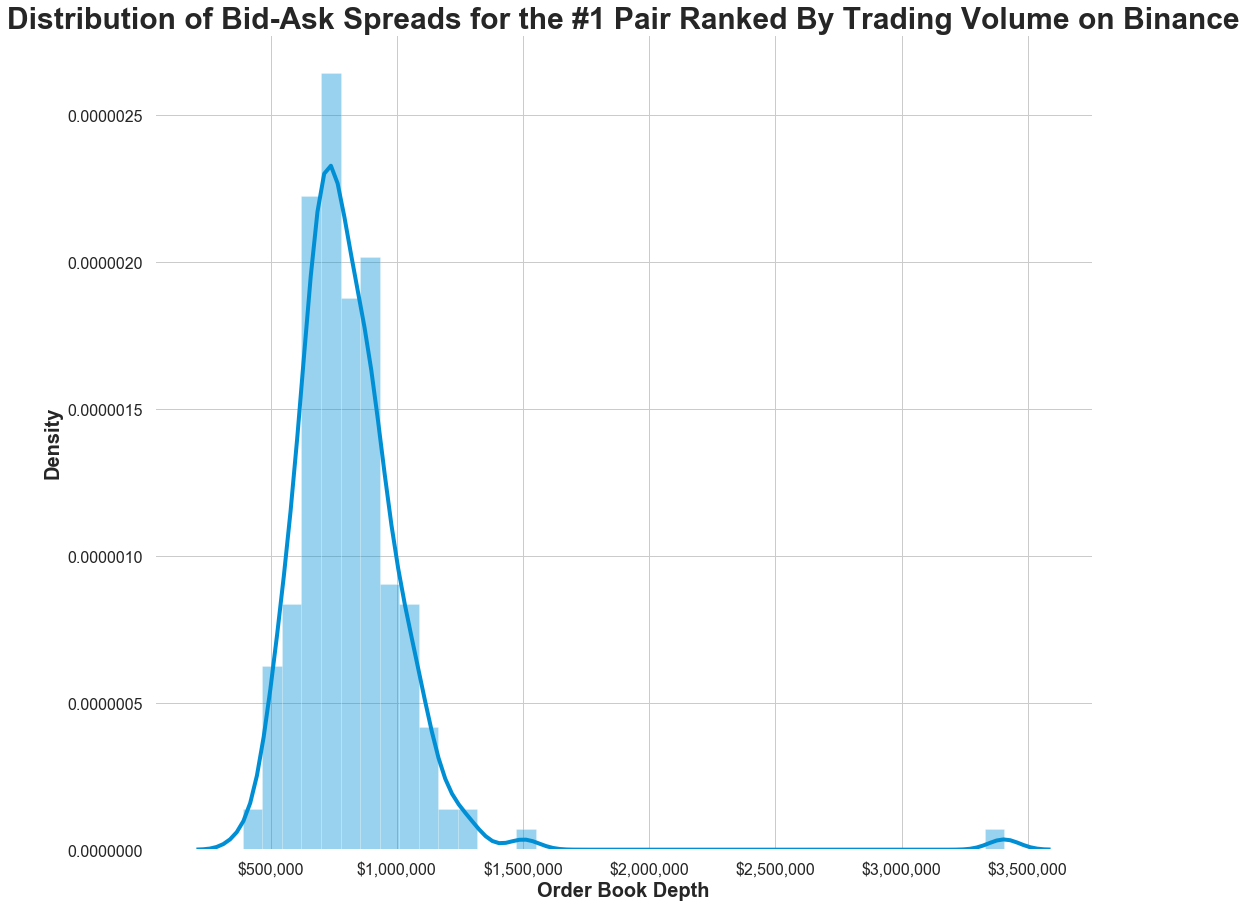

In [6]:
import seaborn as sns
%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,15

ax = sns.distplot(final_df[final_df['volume_rank'] == 1]['order_book_depth'])
ax.set_xlabel('Order Book Depth', fontsize=20, weight='bold')
ax.set_ylabel('Density', fontsize=20, weight='bold')
ax.set_title('Distribution of Bid-Ask Spreads for the #1 Pair Ranked By Trading Volume on Binance', fontsize=30, weight='bold')
ax.get_xaxis().set_major_formatter(
    plt.ticker.FuncFormatter(lambda x,  p: '$' + format(int(x), ',')))

/Users/anthony/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5,0.98,'Relationship Between Volatility of Order Book Depth vs. Order Book Depth Rank')

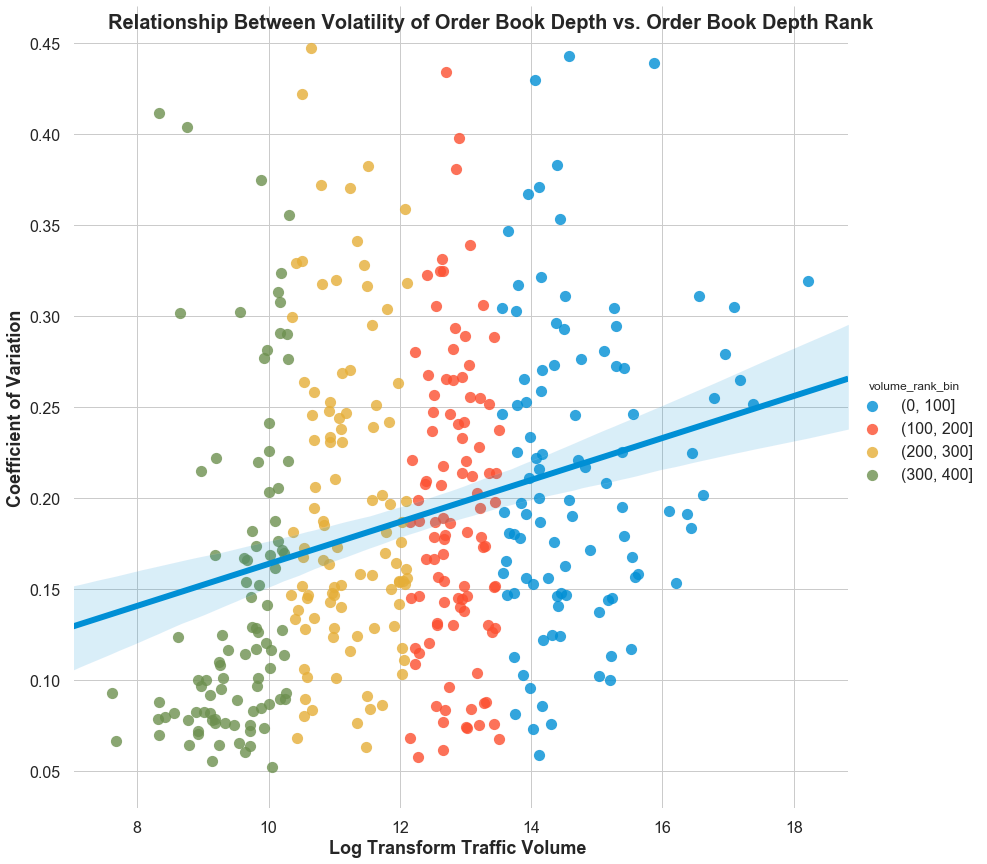

In [7]:



reg_df = pd.DataFrame( final_df.groupby('average_volume')['order_book_depth'].std()/ final_df.groupby('average_volume')['order_book_depth'].mean() )



no_outliers = reg_df[(reg_df['order_book_depth'] < reg_df['order_book_depth'].quantile(.95)) & (reg_df['order_book_depth'] > reg_df['order_book_depth'].quantile(.05))].reset_index()


no_outliers['log_volume'] = np.log(no_outliers['average_volume'])

no_outliers['volume_rank'] = no_outliers['average_volume'].rank(ascending=False)

no_outliers = no_outliers.sort_values('volume_rank', ascending=True)

no_outliers['volume_rank_bin'] = pd.cut(no_outliers['volume_rank'], gen_bins(no_outliers['volume_rank'].max(), 100))


g = sns.lmplot(data=no_outliers, x='log_volume', y='order_book_depth', hue='volume_rank_bin', fit_reg=False, size=12)
y = sns.regplot(x="log_volume", y="order_book_depth", data=no_outliers, scatter=False, ax=g.axes[0, 0])


fig = g.fig 

# Add a title to the Figure
g.set_xlabels('Log Transform Traffic Volume ', fontsize=18, weight='bold')
g.set_ylabels('Coefficient of Variation', fontsize=18, weight='bold')

fig.suptitle("Relationship Between Volatility of Order Book Depth vs. Order Book Depth Rank", fontsize=20, weight='bold')



/Users/anthony/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5,0.98,'Order Book Depth vs. Traffic Volume on Binance')

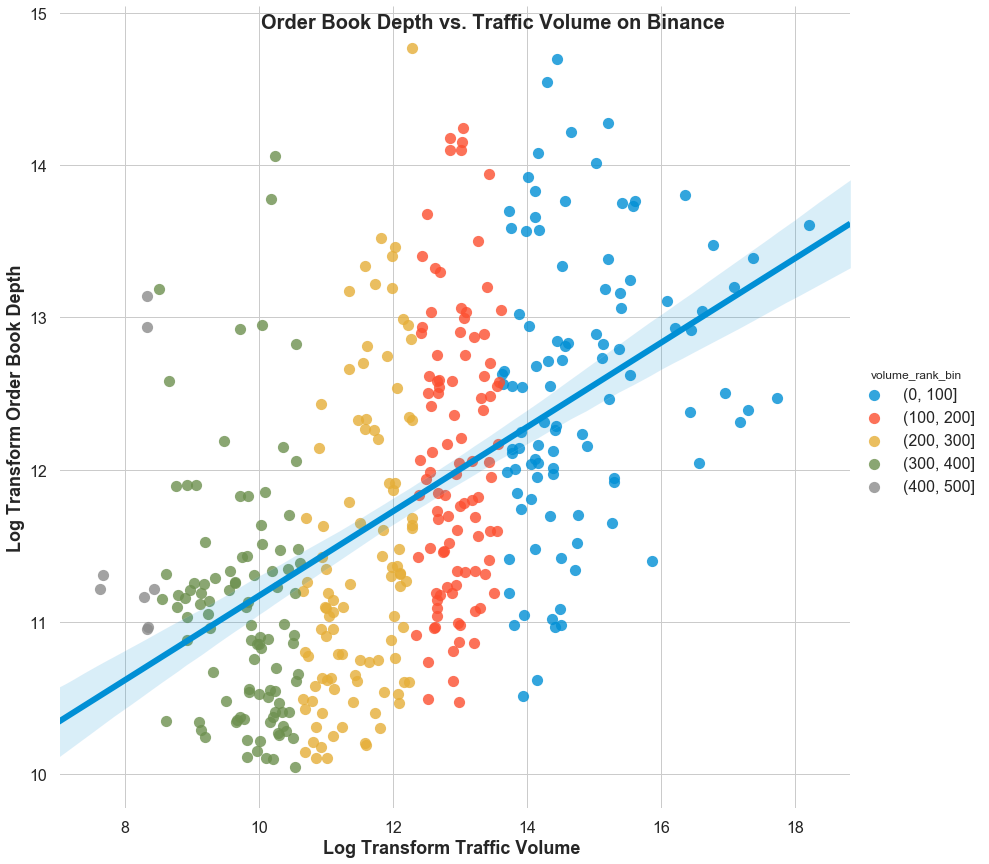

In [8]:

depth_df = final_df.groupby('pair')[['order_book_depth', 'average_volume']].mean()

depth_df_no_outliers = depth_df[(depth_df['order_book_depth'] < depth_df['order_book_depth'].quantile(.98)) & (depth_df['order_book_depth'] > depth_df['order_book_depth'].quantile(.05))].reset_index()



depth_df_no_outliers['log_volume'] = np.log(depth_df_no_outliers['average_volume'])
depth_df_no_outliers['log_depth'] = np.log(depth_df_no_outliers['order_book_depth'])


depth_df_no_outliers['volume_rank'] = depth_df_no_outliers['average_volume'].rank(ascending=False)

depth_df_no_outliers = depth_df_no_outliers.sort_values('volume_rank', ascending=True)

depth_df_no_outliers['volume_rank_bin'] = pd.cut(depth_df_no_outliers['volume_rank'], gen_bins(depth_df_no_outliers['volume_rank'].max(), 100))




g = sns.lmplot(data=depth_df_no_outliers, x='log_volume', y='log_depth', hue='volume_rank_bin', fit_reg=False, size=12)
y = sns.regplot(x="log_volume", y="log_depth", data=depth_df_no_outliers, scatter=False, ax=g.axes[0, 0])


fig = g.fig 

# Add a title to the Figure
g.set_xlabels('Log Transform Traffic Volume ', fontsize=18, weight='bold')
g.set_ylabels('Log Transform Order Book Depth', fontsize=18, weight='bold')

fig.suptitle("Order Book Depth vs. Traffic Volume on Binance", fontsize=20, weight='bold')





Text(0.5,1,'Distribution of Order Depth Across 2 Trading Pairs on Binance')

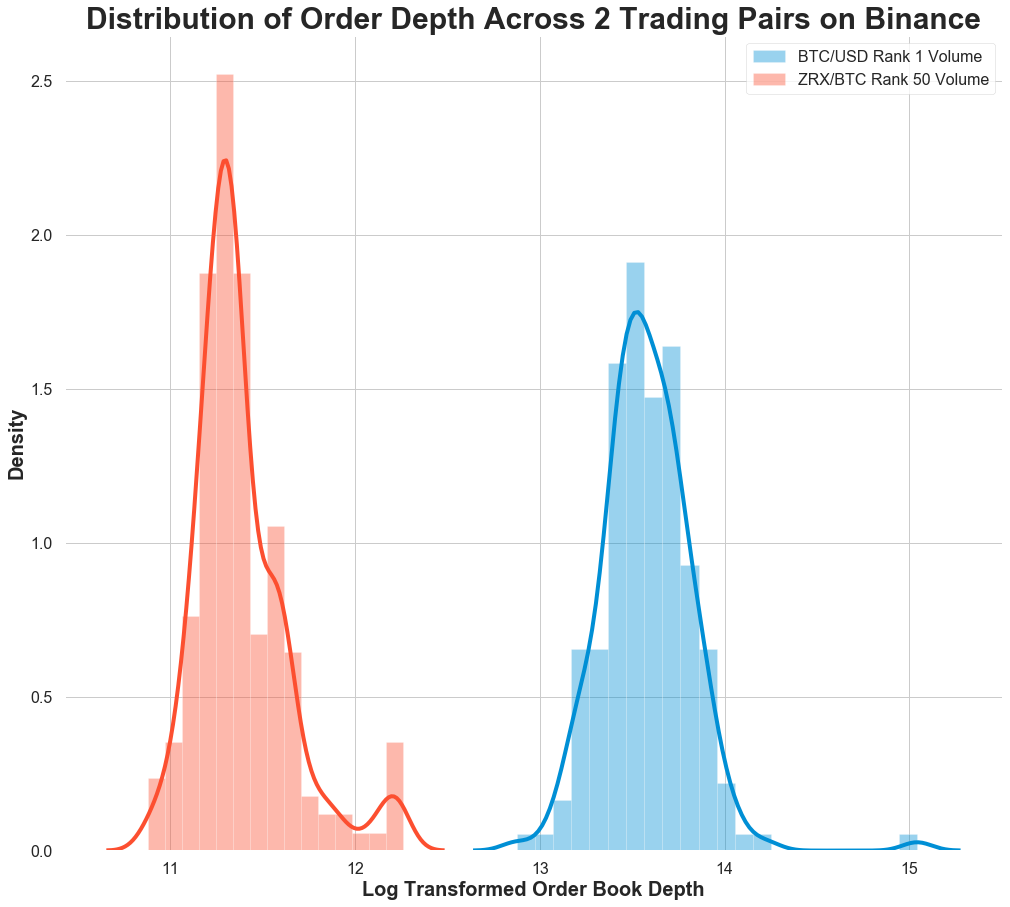

In [9]:
rank_1 = final_df[final_df['volume_rank']==1]
rank_50 = final_df[final_df['volume_rank']==50]

ax1 = sns.distplot(np.log(rank_1['order_book_depth']))
ax2 = sns.distplot(np.log(rank_50['order_book_depth']))



ax1.legend(['BTC/USD Rank 1 Volume','ZRX/BTC Rank 50 Volume'])
ax1.set_xlabel('Log Transformed Order Book Depth', fontsize=20, weight='bold')
ax1.set_ylabel('Density', fontsize=20, weight='bold')
ax1.set_title('Distribution of Order Depth Across 2 Trading Pairs on Binance', fontsize=30, weight='bold')

In [10]:

final_df.groupby('pair').describe()['order_book_depth'].to_csv('/users/anthony/desktop/order_book_depth_every_pair.csv')




In [11]:

# final_df['median rank bins'] = pd.cut(final_df['median_rank'], gen_bins(final_df['median_rank'].max(), 1))
# sns.distplot(final_df[final_df['median rank bins'] == pd.Interval(left=0, right=)]['order_book_depth'])

In [20]:
rank_1.append(rank_50).groupby('pair').describe()['order_book_depth']

,count,mean,std,min,25%,50%,75%,max
pair,,,,,,,,
BTC/USDT,186.0,813490.937184,259551.242416,390147.156530,678494.128087,777512.779865,901277.187149,3.406242e+06
ZRX/BTC,186.0,91097.564660,28307.913080,53235.967951,75835.564373,83158.303517,99787.629122,2.106124e+05


In [29]:
df_rank.sort_values('volume_rank')[['pair', 'volume_rank', 'average_volume']].reset_index()[['pair', 'volume_rank', 'average_volume']]

,pair,volume_rank,average_volume
0,BTC/USDT,1.0,8.111455e+07
1,BNB/USDT,2.0,5.026402e+07
2,ETH/USDT,3.0,3.541061e+07
3,BNB/BTC,4.0,3.287634e+07
4,ENJ/BTC,5.0,2.907063e+07
5,EOS/USDT,6.0,2.641587e+07
6,ETH/BTC,7.0,2.310116e+07
7,LTC/USDT,8.0,1.934069e+07
8,FET/USDT,9.0,1.635659e+07
9,FET/BTC,10.0,1.561637e+07
